<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task7/blob/main/KNN_Assgn_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.
But the shared drive folder have the dataset for your convenience

perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.
Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

In [341]:
#KNN

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [343]:
name = ['Id', 'RI', 'Na', 'Mg','Al','Si','K', 'Ca','Ba', 'Fe', 'Type_of_glass']

In [344]:
df = pd.read_csv('trainKNN.txt', names = name)

In [345]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [346]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


#Data Cleaning

In [347]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [348]:
df[df.duplicated()]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass


In [349]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [350]:
df.nunique()

Id               196
RI               164
Na               136
Mg                90
Al               111
Si               124
K                 65
Ca               133
Ba                30
Fe                28
Type_of_glass      6
dtype: int64

In [351]:
#No Missing values present in this data

In [352]:
df.RI.unique()

array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.51574, 1.51848, 1.51593, 1.51631, 1.5159 ,
       1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594, 1.51409,
       1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588, 1.51629,
       1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 , 1.52725,
       1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818, 1.52664,
       1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829, 1.51708,
       1.51673, 1.51

#Exploratory Data Analysis

In [353]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [354]:
df.drop(['Id'], axis = 1, inplace = True)

In [355]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'], dtype='object')

In [356]:
df['Type_of_glass'].value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type_of_glass, dtype: int64

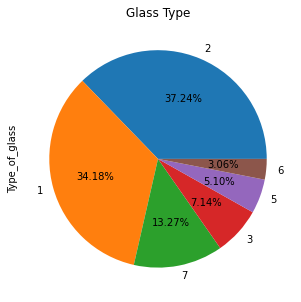

In [357]:
plt.figure(1, figsize = (5,5))
plt.title('Glass Type')
df['Type_of_glass'].value_counts().plot.pie(autopct = '%0.2f%%')

In [358]:
df[columns].columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

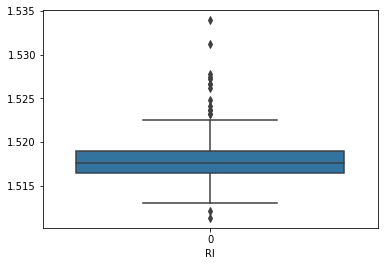

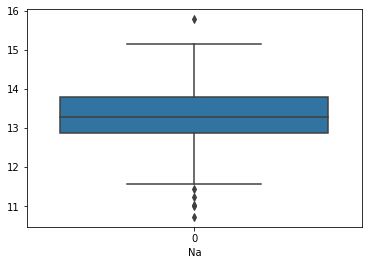

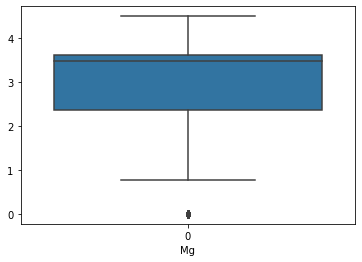

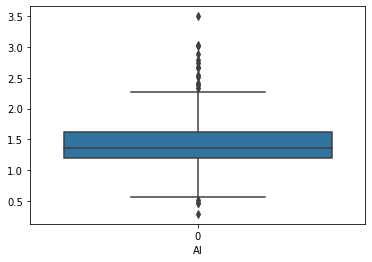

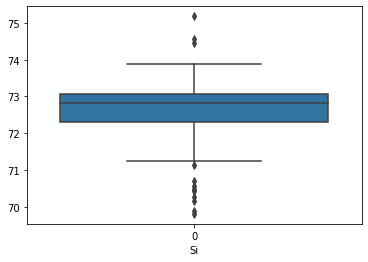

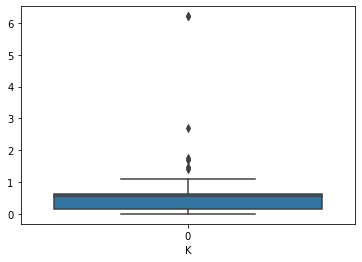

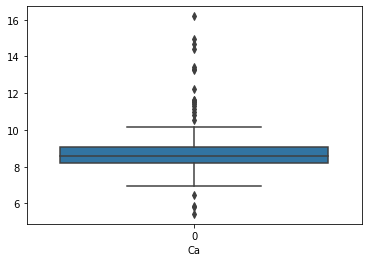

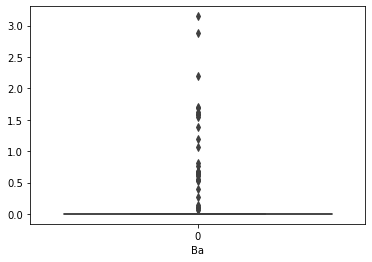

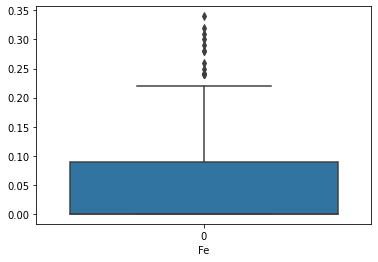

In [359]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for i in columns:
  sns.boxplot(data = df[i])
  plt.xlabel(i)
  plt.show()

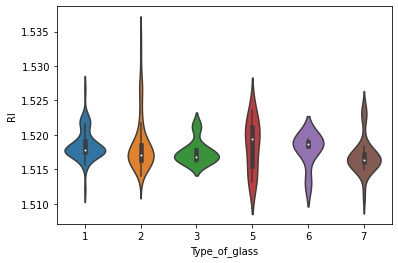

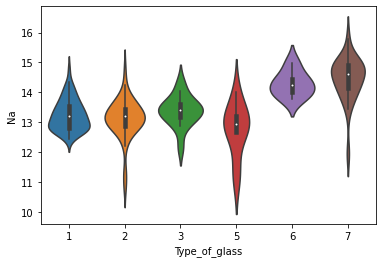

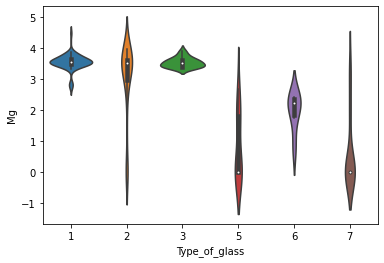

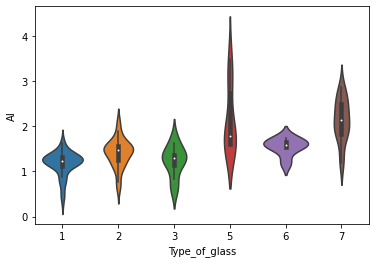

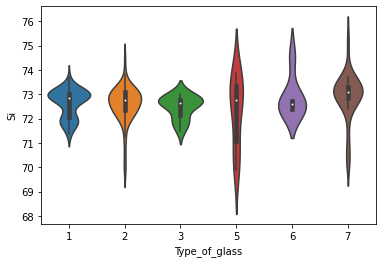

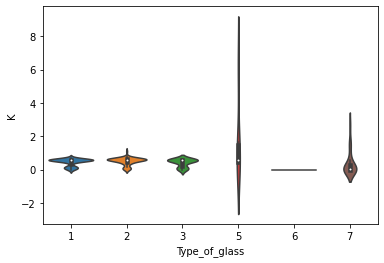

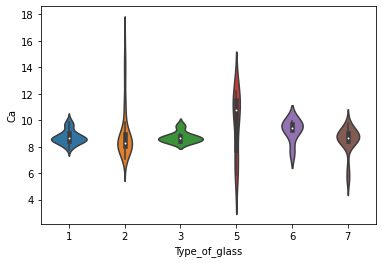

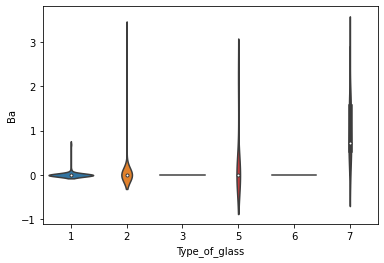

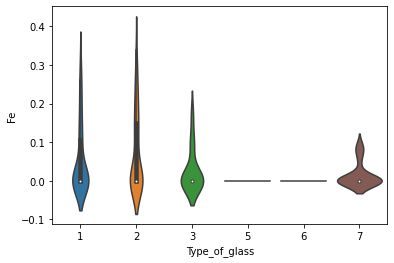

In [360]:
for i in columns:
  sns.violinplot(x = df['Type_of_glass'], y = df[i])
  plt.xlabel('Type_of_glass')
  plt.ylabel(i)
  plt.show()

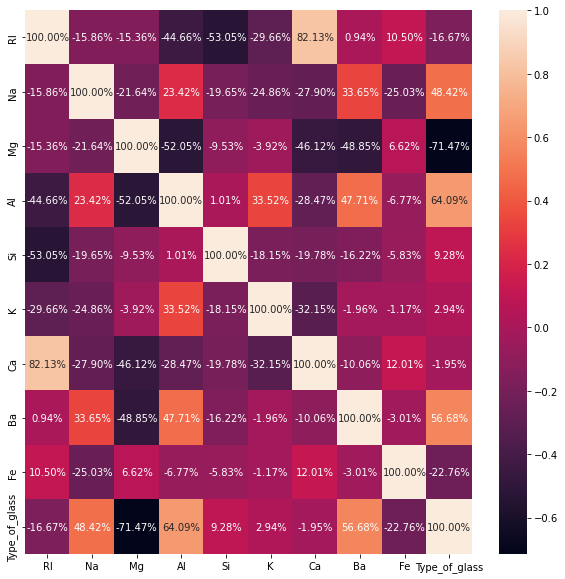

In [361]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True, fmt ='.2%' )

Outliers and Treatment

In [362]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,196.0,1.518295,0.003055,1.51131,1.516458,1.51763,1.518985,1.53393
Na,196.0,13.375204,0.783145,10.73000,12.877500,13.28000,13.792500,15.79000
Mg,196.0,2.758980,1.392641,0.00000,2.362500,3.48000,3.610000,4.49000
Al,196.0,1.454337,0.491688,0.29000,1.190000,1.36000,1.622500,3.50000
Si,196.0,72.635408,0.763578,69.81000,72.317500,72.81000,73.080000,75.18000
K,196.0,0.519388,0.672703,0.00000,0.140000,0.56000,0.610000,6.21000
Ca,196.0,8.910714,1.421490,5.43000,8.220000,8.57500,9.092500,16.19000
Ba,196.0,0.164235,0.485198,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,196.0,0.050255,0.086359,0.00000,0.000000,0.00000,0.090000,0.34000
Type_of_glass,196.0,2.668367,2.062416,1.00000,1.000000,2.00000,3.000000,7.00000


In [363]:
# outliers present in data

for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5* irq ) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (k,perc))

columns RI outliers = 8.16%
columns Na outliers = 3.06%
columns Mg outliers = 17.86%
columns Al outliers = 8.67%
columns Si outliers = 6.12%
columns K outliers = 3.57%
columns Ca outliers = 11.22%
columns Ba outliers = 100.00%
columns Fe outliers = 7.14%
columns Type_of_glass outliers = 16.33%


#Model Building

By Euclidean Metric

In [364]:
#X = df.iloc[:, 0:-1]
#y = df.iloc[:, -1]

In [365]:
#from sklearn.model_selection import train_test_split

In [366]:
#Xtrain,Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state= 2)

In [367]:
Xtrain = df.iloc[:,0:-1]
ytrain = df.iloc[:,-1]

In [368]:
from sklearn.preprocessing import StandardScaler

In [369]:
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)

In [370]:
Xtrain

array([[ 0.89081203,  0.3389847 ,  1.24616006, ..., -0.11334995,
        -0.33935667, -0.5834224 ],
       [-0.22479561,  0.65902807,  0.60544985, ..., -0.76221546,
        -0.33935667, -0.5834224 ],
       [-0.69400706,  0.19816562,  0.56945489, ..., -0.79747989,
        -0.33935667, -0.5834224 ],
       ...,
       [-0.62182068,  1.27351132, -1.98618697, ...,  0.38035207,
         0.77644048, -0.5834224 ],
       [-0.67760106,  0.97907143, -1.98618697, ...,  0.18992414,
         1.8509118 , -0.5834224 ],
       [-0.47416673,  1.97760672, -1.98618697, ..., -0.36020096,
         2.94604604, -0.5834224 ]])

In [371]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [372]:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors= 7)

In [373]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [374]:
print('Train-score',knn.score(Xtrain,ytrain))
print('val-accuracy',np.mean(cross_val_score(knn, Xtrain, ytrain, cv = 7)))

Train-score 0.7346938775510204
val-accuracy 0.6428571428571429


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  UserWarning,


In [375]:
#testKnn
name = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Of_Glass']
df2 = pd.read_csv('testKNN.txt',names = name)
df2.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [376]:
df2.drop('Id', axis = 1,inplace = True )

In [377]:
df_final= df2
df2.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_Of_Glass'], dtype='object')

In [378]:
Xtest = df2.iloc[:,0:-1]
ytest = df2.iloc[:,-1]

In [379]:
ss = StandardScaler()
Xtest = ss.fit_transform(Xtest)

In [380]:
ypred = knn.predict(Xtest)
ypred

array([1, 1, 1, 2, 1, 2, 2, 2, 1, 5, 2, 5, 6, 2, 7, 7, 7, 7])

In [381]:
df_final['Type_of_glass_pred'] = ypred

In [382]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_of_glass_pred
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
5,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
6,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,2
7,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
8,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
9,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5


In [383]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred)

In [384]:
acc

0.6111111111111112

#By Manhattten Metric

In [385]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors= 7)

In [386]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [387]:
print('Train-score',knn.score(Xtrain,ytrain))
print('val-accuracy',np.mean(cross_val_score(knn, Xtrain, ytrain, cv = 7)))

Train-score 0.7653061224489796
val-accuracy 0.6683673469387755


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  UserWarning,


In [388]:
y_pred = knn.predict(Xtest)
print(y_pred)

[1 1 1 2 1 1 2 2 1 5 2 5 6 6 2 7 7 7]


In [389]:
df_final['Type_of_glass_pred'] = ypred

In [390]:
df_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass,Type_of_glass_pred
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
5,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
6,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,2
7,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
8,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
9,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5


In [391]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest, y_pred)

In [392]:
accu   #acccuracy

0.6111111111111112

Conclusions
Fitting k-NN model by without splitting training data and Clean the outliers from the features

By using Euclidean metric :- 64%

By using Manhattan metric :- 67%